In [37]:
# Importa o NumPy com apelido "np"
# Serve para trabalhar com arrays/matrizes numéricas e cálculos matemáticos rápidos
import numpy as np  

# Importa o módulo struct
# Serve para converter dados Python (int, float, etc.) em bytes e vice-versa (útil para salvar/ler arquivos binários ou enviar por rede)
import struct  

# Importa a classe 'array' do módulo array
# Diferente do NumPy, cria arrays homogêneos (todos elementos do mesmo tipo) de forma mais simples e leve que listas
from array import array  

# Importa a função join do módulo os.path
# Serve para construir caminhos de arquivos de forma correta independente do sistema operacional (Windows, Linux, etc.)
from os.path import join  

In [38]:
class MnistDataLoader:
    def __init__(
            self,
            training_images_filepath: str,
            training_labels_filepath: str,
            test_images_filepath: str,
            test_labels_filepath: str,
    ):
        
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def _read_images_labels(
            self, images_filepath: str, labels_filepath: str
    ) -> tuple[list[np.ndarray], array]:
        
        with open(labels_filepath, "rb") as file:

            magic, size = struct.unpack(">II", file.read(8))

            if magic != 2049:

                raise ValueError(
                    "Magic number mismatch, expected 2049 but got {}".format(magic)
                )
            
            labels = array("B", file.read())
        
        with open(images_filepath, "rb") as file:

            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))

            if magic != 2051:

                raise ValueError(
                    "Magic number mismatch, expected 2051 but got {}".format(magic)
                )
            image_data = array("B", file.read())

        images = [0] * size
        for i in range(size):
            img = np.array(image_data[i * rows *cols : (i + 1) * rows * cols])
            img = img.reshape(28,28)
            images[i] = img

        return images, labels
    
    def load_data(
            self,
    ) -> tuple[tuple[list[np.ndarray], array], tuple[list[np.ndarray], array]]:
        x_train, y_train = self._read_images_labels(
            self.training_images_filepath, self.training_labels_filepath
        )
        # Load test data
        x_test, y_test = self._read_images_labels(
            self.test_images_filepath, self.test_labels_filepath
        )
        # Return the loaded data as a tuple of tuples
        return (x_train, y_train), (x_test, y_test)
            

In [39]:
%matplotlib inline

import random
import matplotlib.pyplot as plt
import os



In [40]:
input_path = './archive'
training_images_filepath = os.path.join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = os.path.join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = os.path.join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = os.path.join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

def show_images(images: list[np.ndarray], title_texts: list[str]) -> None:
    cols = 5
    # Calculate the number of rows needed based on the number of images
    rows = int(len(images) / cols) + 1
    # Set the figure size for the plot
    plt.figure(figsize=(30, 20))
    # Initialize the subplot index
    index = 1
    # Loop through each image and its corresponding title
    for image, title_text in zip(images, title_texts):
        # Add a subplot in the grid
        plt.subplot(rows, cols, index)
        # Display the image in grayscale
        plt.imshow(image, cmap=plt.cm.gray)
        # Set the title for the image if provided
        if title_text:
            plt.title(title_text, fontsize=15)
        # Move to the next subplot index
        index += 1

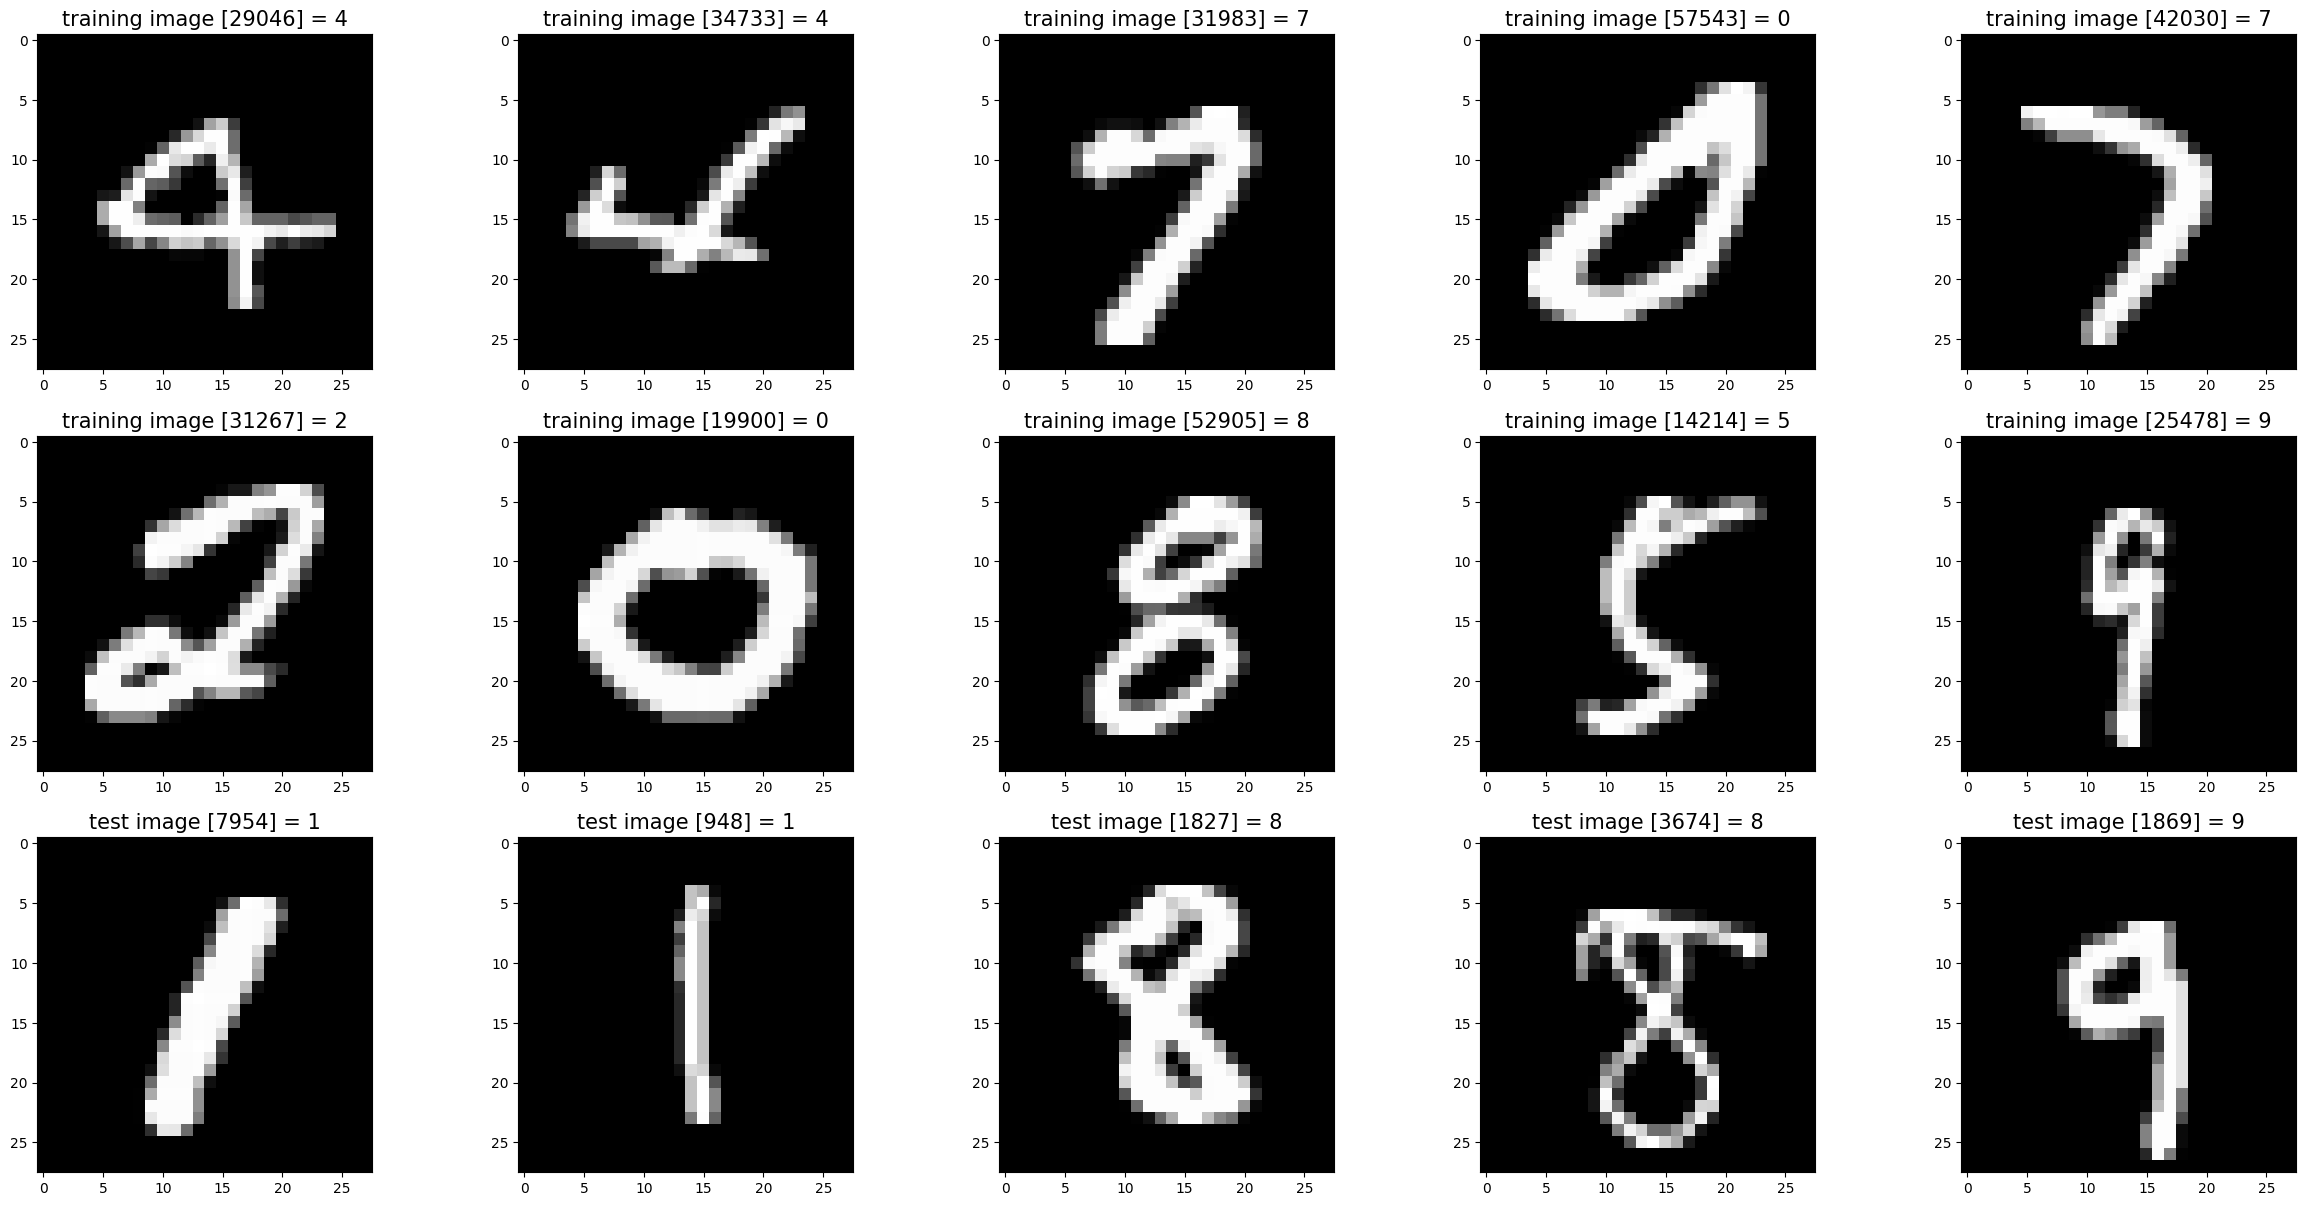

In [41]:
# Load MNIST dataset using the MnistDataLoader class
mnist_dataloader = MnistDataLoader(
    training_images_filepath,
    training_labels_filepath,
    test_images_filepath,
    test_labels_filepath,
)
# Load the training and test data
(X_train, y_train), (X_test, y_test) = mnist_dataloader.load_data()

# Initialize lists to hold images and their titles for display
images_to_show = []
titles_to_show = []

# Select 10 random training images to display
for _ in range(10):
    # Generate a random index within the range of training data
    random_index = random.randint(1, 60000)
    # Append the randomly selected training image to the list
    images_to_show.append(X_train[random_index])
    # Append the corresponding title with the image index and label
    titles_to_show.append(f"training image [{random_index}] = {y_train[random_index]}")

# Select 5 random test images to display
for _ in range(5):
    # Generate a random index within the range of test data
    random_index = random.randint(1, 10000)
    # Append the randomly selected test image to the list
    images_to_show.append(X_test[random_index])
    # Append the corresponding title with the image index and label
    titles_to_show.append(f"test image [{random_index}] = {y_test[random_index]}")

# Display the selected images with their titles
show_images(images_to_show, titles_to_show)

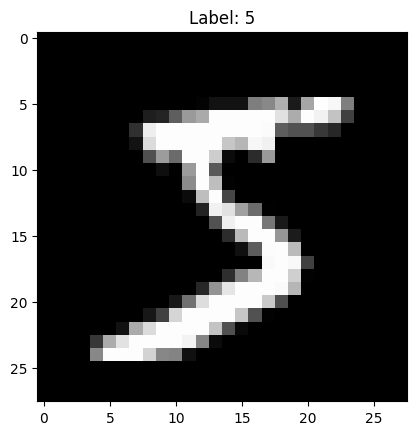

In [42]:
# Display the first training image using matplotlib
plt.imshow(X_train[0], cmap="gray")  # Show the image in grayscale
plt.title(f"Label: {y_train[0]}")  # Set the title of the plot to the label of the image
plt.show()  # Render the plot

In [43]:
X_train[0].shape

(28, 28)

In [44]:
flattened_shape = X_train[0].reshape(-1).shape

In [45]:
flattened_shape

(784,)

In [46]:
# Convert the lists of images and labels into numpy arrays
# This is necessary for compatibility with Keras, which expects numpy arrays as input
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Normalize the image data by scaling the pixel values to the range [0, 1]
# Pixel values in the MNIST dataset range from 0 to 255
# Dividing by 255.0 scales these values to the range [0, 1], which can improve the performance of many machine learning algorithms
X_train = X_train / 255.0
X_test = X_test / 255.0

In [47]:
# Reshape the first training image from a 2D array to a 1D array
# The original shape of X_train[0] is (28, 28), representing a 28x28 pixel image
# The reshape(-1) method flattens the 2D array into a 1D array with 784 elements
flattened_image = X_train[0].reshape(-1)
flattened_image

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [48]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [51]:
with tf.device("/cpu:0"):

    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(1024, activation="relu"))
    model.add(Dense(10, activation="softmax"))

    optimizer = tf.keras.optimizers.Adam(3e-4)

    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"],
    )

    history = model.fit(
        X_train, y_train, epochs=10, validation_split=0.2, batch_size=64
    )

c:\Users\joaop\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8463 - loss: 0.5797 - val_accuracy: 0.9499 - val_loss: 0.1767
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9557 - loss: 0.1592 - val_accuracy: 0.9655 - val_loss: 0.1245
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9714 - loss: 0.1041 - val_accuracy: 0.9694 - val_loss: 0.1054
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9808 - loss: 0.0720 - val_accuracy: 0.9734 - val_loss: 0.0900
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9863 - loss: 0.0539 - val_accuracy: 0.9747 - val_loss: 0.0848
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9896 - loss: 0.0425 - val_accuracy: 0.9764 - val_loss: 0.0780
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9931 - loss: 0.0308 - val_accuracy: 0.9783 - val_loss: 0.0741
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9940 - loss: 0.0247 - val_accuracy: 0.

Who's Adam?

Adam is not a person, but an optimization algorithm widely used in deep learning. Its name stands for Adaptive Moment Estimation. Adam is renowned for its efficiency and effectiveness in training neural networks.

Key Features of Adam:

Adaptive Learning Rates: Unlike traditional optimization algorithms that use a single static learning rate, Adam dynamically adapts the learning rate for each parameter in the model. This adaptive mechanism allows for faster convergence and improved performance.

Combination of AdaGrad and RMSProp:

AdaGrad: Adjusts the learning rate based on the frequency of updates for each parameter, which is useful for handling sparse data.
RMSProp: Normalizes the gradients using a moving average to deal with non-stationary targets.
By merging these two approaches, Adam benefits from AdaGrad's ability to handle sparse gradients and RMSProp's capacity to adjust learning rates effectively.
Moment Estimation:

First Moment (Mean): Tracks the mean of the gradients (similar to momentum).
Second Moment (Variance): Tracks the uncentered variance of the gradients.
These moment estimates help in providing stable and reliable parameter updates.
Why Use Adam?
Efficiency: Adam is computationally efficient, requiring little memory overhead.
Default Hyperparameters: Often works well with default hyperparameter values, reducing the need for extensive tuning.
Robustness: Provides reliable performance across a variety of deep learning tasks and architectures.
What is momentum?
Momentum is an important hyperparameter used in optimization algorithms such as Stochastic Gradient Descent (SGD) and Adam. Its primary purpose is to accelerate the convergence of the algorithm by leveraging the concept of accumulated gradients, often referred to as "momentum."

How Does Momentum Work?
To understand momentum, let's draw an analogy from physics. Imagine a ball rolling downhill:

Speed Accumulation: As the ball rolls, it gathers speed over time.
Overcoming Obstacles: The accumulated speed helps the ball overcome small obstacles in its path.
Similarly, in optimization algorithms:

Gradient Accumulation: Momentum accumulates past gradient values.
Enhancing Navigation: This accumulation allows the optimizer to navigate through challenging terrains, such as flat regions or small local minima, more effectively.
Benefits of Using Momentum
Faster Convergence: By using momentum, the optimization process can converge faster towards the global minimum.
Smoother Trajectory: It helps in smoothing out the optimization path by dampening oscillations.
Improved Navigation: Momentum aids in moving past small local minima that might trap standard gradient descent methods.
Think about it like this: without momentum, an optimizer might struggle to move forward in flat regions where gradient values are small. With momentum, however, the optimizer builds up "speed," allowing it to push past these areas and continue progressing towards the optimal solution.

To learn more about other flavours of optimizers, please go to pytorch documentation

To learn more about why momentum really works, check this site

In [52]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,442,272 (9.32 MB)

 Trainable params: 814,090 (3.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,628,182 (6.21 MB)

In [53]:
with tf.device("/cpu:0"):
    y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [54]:
y_prob[0]

array([3.2948439e-08, 2.3183526e-09, 9.2378212e-07, 6.2905521e-05,
       9.6380360e-12, 3.4015075e-09, 1.5667776e-12, 9.9993432e-01,
       5.1825708e-07, 1.3163418e-06], dtype=float32)

In [55]:
y_pred = y_prob.argmax(axis=-1)
y_pred[0]

np.int64(7)

In [56]:
from sklearn.metrics import accuracy_score, classification_report

In [57]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

Accuracy: 0.9803
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



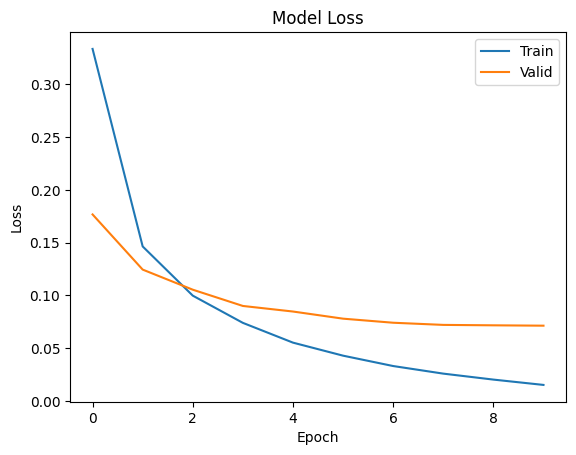

In [58]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")

plt.legend(["Train", "Valid"], loc="upper right")
plt.show()

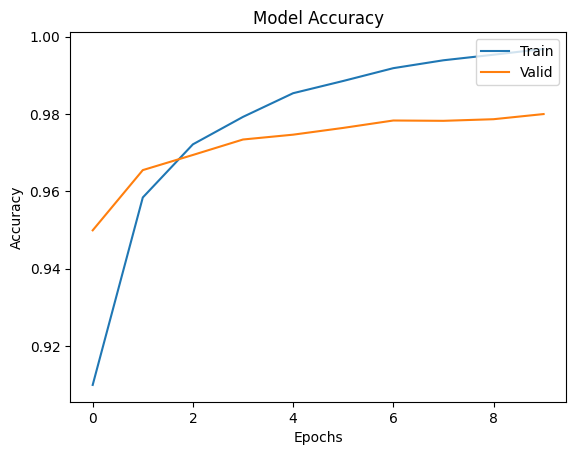

In [59]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")

plt.legend(["Train", "Valid"], loc="upper right")
plt.show()

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [62]:
X_train_flatten = X_train.reshape(-1, 28 * 28)
X_test_flatten = X_test.reshape(-1, 28 * 28)

model_lr = LogisticRegression(max_iter=1000, random_state=271828, n_jobs=-1)
model_rf = RandomForestClassifier(random_state=271828, n_jobs=-1)

model_lr.fit(X_train_flatten, y_train)
model_rf.fit(X_train_flatten, y_train)

y_pred_lr = model_lr.predict(X_test_flatten)
y_pred_rf = model_rf.predict(X_test_flatten)


print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")

Logistic Regression Accuracy: 0.9266
Random Forest Accuracy: 0.9691


In [63]:
with tf.device("/cpu:0"):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(1024, activation="relu"))
    model.add(Dense(1024, activation="relu"))
    model.add(Dense(1024, activation="relu"))
    model.add(Dense(10, activation="softmax"))

    optimizer = tf.keras.optimizers.Adam(3e-4)

    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"],
    )

    history = model.fit(
        X_train, y_train, epochs=10, validation_split=0.2, batch_size=64
    )

    y_prob = model.predict(X_test)

    y_pred = y_prob.argmax(axis=-1)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")


c:\Users\joaop\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8743 - loss: 0.4232 - val_accuracy: 0.9623 - val_loss: 0.1269
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9762 - loss: 0.0788 - val_accuracy: 0.9715 - val_loss: 0.0895
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9836 - loss: 0.0511 - val_accuracy: 0.9740 - val_loss: 0.0916
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9901 - loss: 0.0313 - val_accuracy: 0.9720 - val_loss: 0.1067
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9927 - loss: 0.0239 - val_accuracy: 0.9778 - val_loss: 0.0917
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9947 - loss: 0.0168 - val_accuracy: 0.9758 - val_loss: 0.0963
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9936 - loss: 0.0181 - val_accuracy: 0.9767 - val_loss: 0.0971
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9956 - loss: 0.0134 - val_ac